In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("cardekho.csv")
df.head()

Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
df.describe()

vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.560000e+05  
75%        5.000000   8.250000e+05  
max        9.000000   3.950000e+07

In [10]:
df[df.duplicated()]

car_name       brand        model  vehicle_age  km_driven  \
197            Honda City       Honda         City            8      70000   
360         Maruti Baleno      Maruti       Baleno            2       5000   
1353   Maruti Swift Dzire      Maruti  Swift Dzire            4      50000   
1429       Maruti Wagon R      Maruti      Wagon R           13     100000   
1485          Hyundai i20     Hyundai          i20            3      50000   
...                   ...         ...          ...          ...        ...   
15229        Maruti Swift      Maruti        Swift            8      80000   
15324      Maruti Wagon R      Maruti      Wagon R            6      50000   
15367          Tata Tiago        Tata        Tiago            4      30000   
15378       Hyundai Grand     Hyundai        Grand            6      30000   
15392    Land Rover Rover  Land Rover        Rover            5     128000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
197    Individual    Petrol            Manual    16.80    1497     116.30   
360    Individual    Petrol         Automatic    21.40    1197      83.10   
1353   Individual    Diesel            Manual    28.40    1248      74.02   
1429   Individual    Petrol            Manual    18.90    1061      67.00   
1485   Individual    Petrol            Manual    18.60    1197      81.83   
...           ...       ...               ...      ...     ...        ...   
15229  Individual    Diesel            Manual    22.90    1248      74.00   
15324  Individual       CNG            Manual    26.60     998      58.16   
15367  Individual    Petrol            Manual    23.84    1199      84.00   
15378  Individual    Petrol            Manual    18.90    1197      82.00   
15392      Dealer    Diesel         Automatic    12.63    2179     147.50   

       seats  selling_price  
197        5         545000  
360        5         686000  
1353       5         680000  
1429       5         150000  
1485       5         625000  
...      ...            ...  
15229      5         350000  
15324      5         450000  
15367      5         350000  
15378      5         450000  
15392      5        2675000  

[167 rows x 13 columns]

In [11]:
df = df.drop_duplicates(keep="first", ignore_index = True)

In [12]:
df[df['seats'] == 0]

car_name   brand  model  vehicle_age  km_driven seller_type  \
3207     Honda City   Honda   City           18      40000  Individual   
12504  Nissan Kicks  Nissan  Kicks            2      10000  Individual   

      fuel_type transmission_type  mileage  engine  max_power  seats  \
3207     Petrol            Manual    13.00    1493     100.00      0   
12504    Diesel            Manual    19.39    1461     108.49      0   

       selling_price  
3207          115000  
12504        1154000

In [13]:

df.loc[df['seats'] == 0, "seats"] = 5

In [14]:

df['seats'].value_counts()

seats
5    12769
7     1902
8      310
6      125
4       76
9       55
2        7
Name: count, dtype: int64

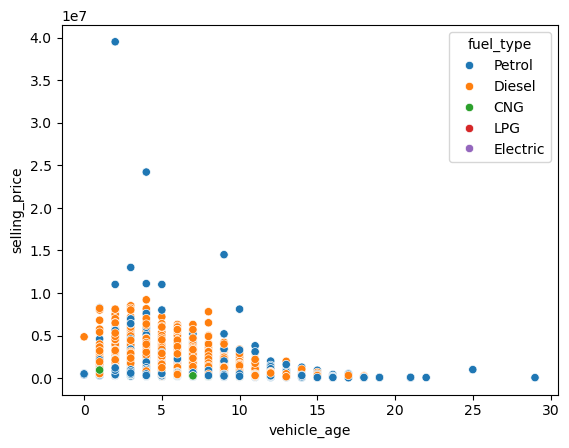

In [15]:
sns.scatterplot(x=df['vehicle_age'], y=df['selling_price'], hue=df['fuel_type'])
plt.show()

In [16]:
df['selling_price'].max()

39500000

In [17]:
df = df[(df['selling_price'] < 15000000)]

In [18]:
df.describe()

vehicle_age     km_driven       mileage        engine     max_power  \
count  15242.000000  1.524200e+04  15242.000000  15242.000000  15242.000000   
mean       6.041530  5.564631e+04     19.698986   1485.681144    100.544486   
std        3.016203  5.176637e+04      4.166931    518.452489     42.562150   
min        0.000000  1.000000e+02      6.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   5998.000000    626.000000   

              seats  selling_price  
count  15242.000000   1.524200e+04  
mean       5.326991   7.706239e+05  
std        0.806373   8.161700e+05  
min        2.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.590000e+05  
75%        5.000000   8.250000e+05  
max        9.000000   1.450000e+07

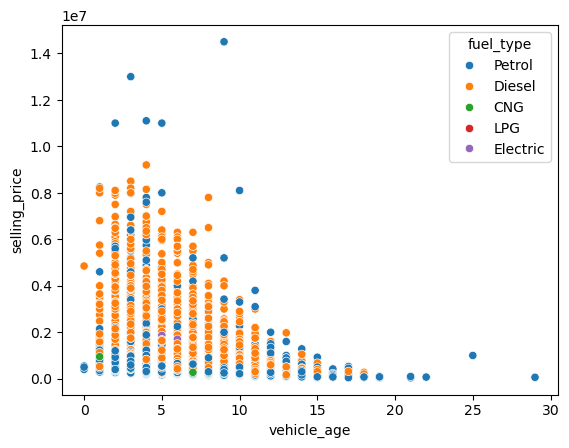

In [19]:
sns.scatterplot(x=df['vehicle_age'], y=df['selling_price'], hue=df['fuel_type'])
plt.show()

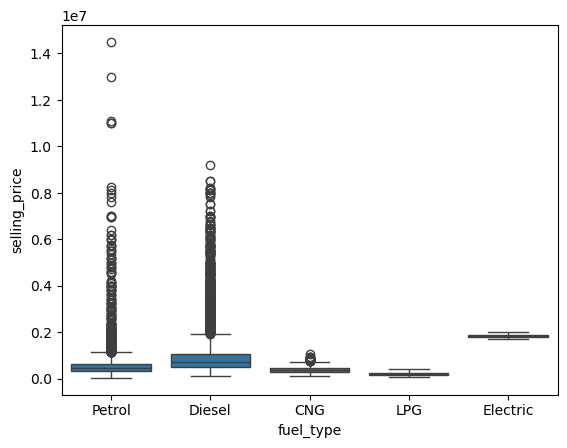

In [20]:
sns.boxplot(data=df, x="fuel_type", y="selling_price")
plt.show()

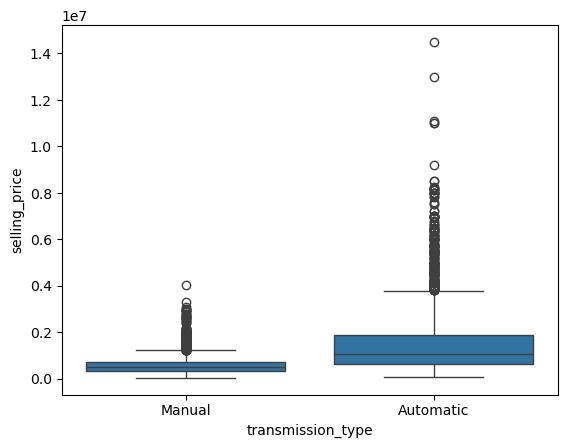

In [21]:
sns.boxplot(data=df, x="transmission_type", y="selling_price")
plt.show()

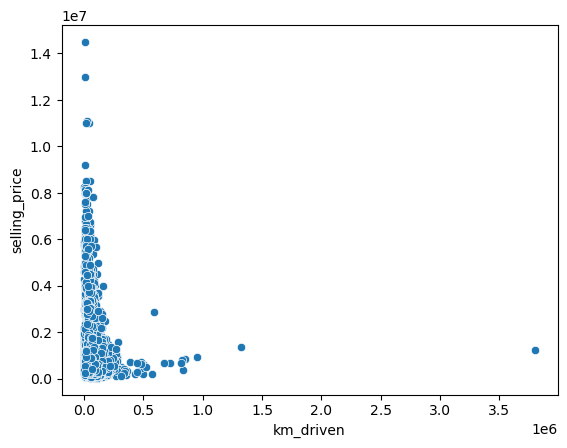

In [22]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

In [23]:
df['km_driven'].max()

3800000

In [24]:
df = df[(df['km_driven'] < 1000000)]

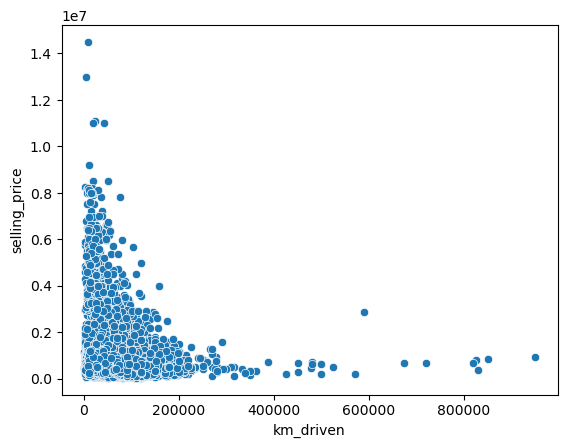

In [25]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

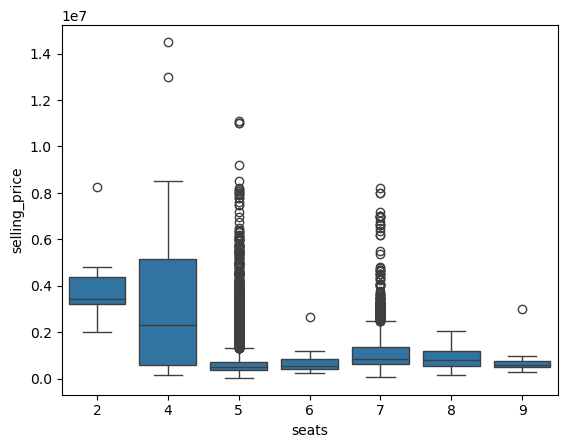

In [26]:
sns.boxplot(data=df, x="seats", y="selling_price")
plt.show()

In [27]:
df.corr(numeric_only=True)

vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.423490 -0.258157  0.099842   0.005766   
km_driven         0.423490   1.000000 -0.124843  0.233522   0.048488   
mileage          -0.258157  -0.124843  1.000000 -0.632258  -0.532264   
engine            0.099842   0.233522 -0.632258  1.000000   0.806539   
max_power         0.005766   0.048488 -0.532264  0.806539   1.000000   
seats             0.031291   0.232621 -0.442956  0.556908   0.176755   
selling_price    -0.259072  -0.109513 -0.318624  0.611834   0.773239   

                  seats  selling_price  
vehicle_age    0.031291      -0.259072  
km_driven      0.232621      -0.109513  
mileage       -0.442956      -0.318624  
engine         0.556908       0.611834  
max_power      0.176755       0.773239  
seats          1.000000       0.134829  
selling_price  0.134829       1.000000

In [28]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [30]:
cat_cols = df.select_dtypes("object").columns.to_list()

In [31]:
unique_values = df[cat_cols].nunique()

In [32]:
unique_values

car_name             119
brand                 30
model                118
seller_type            3
fuel_type              5
transmission_type      2
dtype: int64

In [33]:
onehot_columns = ['seller_type', 'fuel_type', 'transmission_type']
freq_columns = ['car_name', 'brand', 'model']

In [34]:
for col in freq_columns:
    freq = X_train[col].value_counts() / len(X_train)
    X_train[col + '_freq'] = X_train[col].map(freq)
    X_test[col + '_freq'] = X_test[col].map(freq)
    mean_freq = freq.mean()
    X_test[col + '_freq'] = X_test[col + '_freq'].fillna(mean_freq)

In [35]:
X_train.head()

car_name     brand   model  vehicle_age  km_driven seller_type  \
6205  Mahindra XUV500  Mahindra  XUV500            2      18000  Individual   
7707       Tata Nexon      Tata   Nexon            4      25000  Individual   
5332  Mahindra XUV500  Mahindra  XUV500            4      58500      Dealer   
2935      Maruti Eeco    Maruti    Eeco            6      59000      Dealer   
6419    Maruti Baleno    Maruti  Baleno            4      32000      Dealer   

     fuel_type transmission_type  mileage  engine  max_power  seats  \
6205    Diesel            Manual    15.10    2179     152.87      7   
7707    Petrol            Manual    17.00    1198     108.50      5   
5332    Diesel            Manual    16.00    2179     140.00      7   
2935    Petrol            Manual    15.10    1196      73.00      7   
6419    Petrol            Manual    21.01    1197      81.80      5   

      car_name_freq  brand_freq  model_freq  
6205       0.022122    0.066835    0.022122  
7707       0.005343    0.027747    0.005343  
5332       0.022122    0.066835    0.022122  
2935       0.007593    0.321241    0.007593  
6419       0.024091    0.321241    0.024091

In [36]:
X_train = X_train.drop(["car_name", "brand", "model"], axis = 1)
X_test = X_test.drop(["car_name", "brand", "model"], axis = 1)

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
transformer = ColumnTransformer(
        transformers= [
            ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"),onehot_columns)
        ], remainder = "passthrough"
)

In [39]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [40]:

encoded_cols = transformer.get_feature_names_out()

In [41]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [42]:

X_train.head()

onehot__seller_type_Individual  onehot__seller_type_Trustmark Dealer  \
0                             1.0                                   0.0   
1                             1.0                                   0.0   
2                             0.0                                   0.0   
3                             0.0                                   0.0   
4                             0.0                                   0.0   

   onehot__fuel_type_Diesel  onehot__fuel_type_Electric  \
0                       1.0                         0.0   
1                       0.0                         0.0   
2                       1.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   onehot__fuel_type_LPG  onehot__fuel_type_Petrol  \
0                    0.0                       0.0   
1                    0.0                       1.0   
2                    0.0                       0.0   
3                    0.0                       1.0   
4                    0.0                       1.0   

   onehot__transmission_type_Manual  remainder__vehicle_age  \
0                               1.0                     2.0   
1                               1.0                     4.0   
2                               1.0                     4.0   
3                               1.0                     6.0   
4                               1.0                     4.0   

   remainder__km_driven  remainder__mileage  remainder__engine  \
0               18000.0               15.10             2179.0   
1               25000.0               17.00             1198.0   
2               58500.0               16.00             2179.0   
3               59000.0               15.10             1196.0   
4               32000.0               21.01             1197.0   

   remainder__max_power  remainder__seats  remainder__car_name_freq  \
0                152.87               7.0                  0.022122   
1                108.50               5.0                  0.005343   
2                140.00               7.0                  0.022122   
3                 73.00               7.0                  0.007593   
4                 81.80               5.0                  0.024091   

   remainder__brand_freq  remainder__model_freq  
0               0.066835               0.022122  
1               0.027747               0.005343  
2               0.066835               0.022122  
3               0.321241               0.007593  
4               0.321241               0.024091

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [47]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [49]:

y_pred = model.predict(X_test)
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.6127896983789107
mean squared error:  191378973367.20084
mean absolute error:  338926.0150548018


In [50]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0.1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

In [51]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(), param_distributions=params, scoring='r2', cv=5)

In [52]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [53]:
rcv.best_params_

{'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.1}

In [54]:
y_pred = rcv.predict(X_test)

In [55]:
print("r2 score: ", r2_score(y_pred, y_test))
print("mean squared error: ", mean_squared_error(y_pred, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred, y_test))

r2 score:  0.7483372289297326
mean squared error:  129335169666.35735
mean absolute error:  224022.81733405587
